# 1) Introduction: The Crime Analysis task

The prevalence of violent crime, firearm-related offenses, and their potential association with drug-related activities has been a focal point of criminological and sociological research. The increased availability of open data from law enforcement agencies provides an opportunity to analyse crime trends systematically, offering insights into public safety and the effectiveness of policies. Studies such as those by (Davidson, 2019) have highlighted the importance of integrating spatial and temporal dimensions to understand crime patterns effectively. Similarly, research underscores the role of advanced statistical techniques and visual analytics in uncovering hidden correlations between different types of criminal activities. This project builds on these foundations, leveraging big data and modern analytics tools to explore claims about violent crime trends, the geographical distribution of firearm incidents, and the co-occurrence of firearm and drug offenses. Violent crime, firearm-related offences, and their relationship to drug-related activities, among others, have been of great interest in criminological and sociological studies. The apparent advantage of open data from law enforcement agencies enables systematic research on crime trends and can results in the effective assessment of public safety measures and policies.

Aims and Objectives
This project aims to provide a comprehensive analysis of crime patterns in the UK, focusing on three specific claims:
1.	To access whether violent crimes are increasing, decreasing, or stable over time.
2.	To evaluate whether Liverpool has the highest per capita firearm incidents as compared to some different regions.
3.	To investigate the association between firearm and drug-related offenses to reveal various potential correlations and geographical co-occurrence.
The overarching goal is to present actionable insights that support data-driven decision-making in case of law enforcement and policymaking. These objectives are achieved by merging some data-driven analytics along with an in-depth understanding of crime dynamics.
Technical Approach
The technical approach uses primarily Python language – the most frequently-used for data analysis and processing - for problem-solving. The project begins with the cleaning and filtration of extensive datasets – thus ensuring the data's quality and reliability. The evaluation of particularly violent crime trends is performed through time-series analysis. Temporal aggregations and line plots are designed to detect and visualize patterns over time. When comparing firearm incidents across various regions like Liverpool, per capita analysis is executed by normalizing incident data counterparts through population statistics. The advanced statistical techniques like correlation matrices have been used to determine any relationships between firearm & drug offenses that were part of the analysis process, thereby uncovering possible associations (Greenberg, 2020).





# 2) Component Selection and Data Pipeline Implementation

Numpy and Pandas: These are fundamental libraries for data manipulation and analysis in Python. Numpy is excellent for numerical operations, while Pandas provides powerful data structures like DataFrames for handling tabular data.

Seaborn and Matplotlib: These libraries are essential for data visualization. Matplotlib is the core plotting library in Python, and Seaborn builds on Matplotlib to provide beautiful and informative statistical graphics.

Statsmodels: This library is used for statistical modeling and testing. It complements Numpy, Scipy, and Pandas, and is particularly useful for time series analysis and linear regression.

Requests: This library is used for making HTTP requests, which can be useful for fetching data from web APIs or downloading files from the internet.

OS, Gzip, and Shutil: These standard Python libraries provide utilities for interacting with the operating system, handling compressed files, and performing high-level file operations, respectively.

Pyspark Libraries: PySpark is the Python API for Apache Spark, a powerful distributed computing system. The imported components are essential for setting up Spark sessions, defining data types, and performing various data manipulation tasks.

Datetime: This standard library is essential for handling dates and times, which is crucial for time series analysis and any operations involving temporal data.

By combining these powerful and versatile libraries, we ensure a comprehensive toolkit for data manipulation, analysis, visualization, and statistical modeling. This selection enables efficient and effective workflows for a wide range of data-related tasks.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore") # to ignore warning messages
import itertools

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

import statsmodels.api as sm

from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import count, avg, sum, col, to_date
from pyspark.sql.functions import to_date
from statsmodels.tsa.stattools import adfuller
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType

In [2]:
spark = SparkSession.builder.appName("UK Crime file").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=UK Crime file>

In [3]:
mysch = StructType(
    [StructField("Crime ID", IntegerType(), True),
     StructField("Month", DateType(), True),
     StructField("Reported by", StringType(), True),
     StructField("Falls Within", StringType(), True),
     StructField("Longitude", FloatType(), True),
     StructField("Latitude", FloatType(), True),
     StructField("Location", StringType(), True),
     StructField("LSOA Code", StringType(), True),
     StructField("LSOA Name", StringType(), True),
     StructField("Crime Type", StringType(), True),
     StructField("Last Outcome Category", StringType(), True),
     StructField("Context", StringType(), True)])


# 3) Data Extraction and Filtering ... 
### includes System running, test and diagnostics, 

The script begins by defining the file paths for three datasets: the crime dataset, the population dataset,and the postcode transformation dataset. Due to the large size of the crime dataset, it is loaded in manageable chunks using the chunksize parameter with a value of 100,000 rows per chunk. The chunks are then concatenated into a single DataFrame for further processing.

Once the data is loaded, the script selects only the relevant columns: Crime ID, Month, Location, LSOA name, Crime type, LSOA code, and Context. This step ensures that unnecessary columns are excluded, optimizing memory usage and focusing the analysis on meaningful attributes.

Next, the script addresses missing values by dropping rows with null values in the Crime ID or Crime type columns, as these fields are critical for identifying and categorizing crimes. The Month column, which represents the date of the crime, is converted to a standardized datetime format (YYYY-MM), facilitating time-based analyses.

The text fields, including Location, LSOA name, Crime type, LSOA code, and Context, are cleaned by stripping leading and trailing whitespace. This standardization step ensures that comparisons and groupings are not affected by inconsistencies in text formatting.

Finally, the script outputs a sample of the cleaned data and provides detailed information about the cleaned dataset. This includes the structure, data types, and the number of non-null entries for each column, ensuring the dataset is well-prepared for subsequent analysis.

In [4]:
import pandas as pd

# Define the file paths
file_path_crime = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\all_crimes21_hdr.txt.gz"

# Load the Population data
file_path_lsoa_pop = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\LSOA_pop_v2.csv"
lsoa_pop_data = pd.read_csv(file_path_lsoa_pop)

#Load the Postcode data
file_path_posttrans = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\posttrans.csv"
posttrans_data = pd.read_csv(file_path_posttrans)

# Load datasets with low_memory=False
crime_data = pd.read_csv(file_path_crime, low_memory=False)

# Display the first few rows to check the data
print(crime_data.head())

print("Crime Data Info:")
print(crime_data.info())

  Crime ID    Month                     Reported by  \
0      NaN  2010-12  Avon and Somerset Constabulary   
1      NaN  2010-12  Avon and Somerset Constabulary   
2      NaN  2010-12  Avon and Somerset Constabulary   
3      NaN  2010-12  Avon and Somerset Constabulary   
4      NaN  2010-12  Avon and Somerset Constabulary   

                     Falls within  Longitude   Latitude  \
0  Avon and Somerset Constabulary  -0.805600  51.819143   
1  Avon and Somerset Constabulary  -2.494366  51.418169   
2  Avon and Somerset Constabulary  -2.511927  51.409435   
3  Avon and Somerset Constabulary  -2.511571  51.414895   
4  Avon and Somerset Constabulary  -2.511927  51.409435   

                     Location  LSOA code                          LSOA name  \
0  On or near Norfolk Terrace  E01017662                Aylesbury Vale 015C   
1    On or near Keynsham Road  E01014399  Bath and North East Somerset 001A   
2    On or near Harlech Close  E01014399  Bath and North East Somerset 001A  

In [5]:
# Handle missing values
crime_data = crime_data.dropna(subset=['Crime ID', 'Crime type'])

# Convert date format
crime_data['Month'] = pd.to_datetime(crime_data['Month'], format='%Y-%m')

# Standardize text
crime_data['Location'] = crime_data['Location'].str.strip()
crime_data['LSOA name'] = crime_data['LSOA name'].str.strip()
crime_data['Crime type'] = crime_data['Crime type'].str.strip()
crime_data['LSOA code'] = crime_data['LSOA code'].str.strip()
crime_data['Context'] = crime_data['Context'].str.strip()

# Display cleaned data info
print("Cleaned Crime Data Info:")
print(crime_data.info())


Cleaned Crime Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 40835915 entries, 327421 to 65078249
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crime ID               object        
 1   Month                  datetime64[ns]
 2   Reported by            object        
 3   Falls within           object        
 4   Longitude              float64       
 5   Latitude               float64       
 6   Location               object        
 7   LSOA code              object        
 8   LSOA name              object        
 9   Crime type             object        
 10  Last outcome category  object        
 11  Context                object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 4.0+ GB
None


In [6]:
# Total number of crimes 
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("UK Crime file").getOrCreate()

# Load your data
crime_data = spark.read.csv(file_path_crime, header=True, inferSchema=True)

# Total number of crimes 
crime_type_counts = crime_data.groupBy("Crime type").count()
crime_type_counts = crime_type_counts.withColumnRenamed("count", "Total").orderBy(col("Total").desc())
crime_type_counts.show(15)

+--------------------+--------+
|          Crime type|   Total|
+--------------------+--------+
|Anti-social behav...|20211528|
|Violence and sexu...|11411540|
|Criminal damage a...| 5343182|
|         Other theft| 5206259|
|            Burglary| 4350252|
|       Vehicle crime| 4170769|
|         Shoplifting| 3227557|
|         Other crime| 2565111|
|        Public order| 2564695|
|               Drugs| 1682486|
|       Violent crime| 1673219|
|       Bicycle theft|  735689|
|Theft from the pe...|  714621|
|             Robbery|  696008|
|Possession of wea...|  283189|
+--------------------+--------+
only showing top 15 rows



# 4) Design, Development and reasoning behind use of multiple visualization methods, statistics, and machine learning Models

First, we start by loading and cleaning the crime data. The data is initially loaded in chunks to handle large volumes efficiently. We then select the relevant columns for analysis, such as 'Crime ID,' 'Month,' 'Location,' 'LSOA name,' 'Crime type,' 'LSOA code,' and 'Context.' The data undergoes a cleaning process where we handle missing values by dropping rows with crucial missing fields and converting the 'Month' column to a datetime format for easier manipulation. Additionally, we standardize text columns to ensure consistency across the dataset.

Next, we focus on calculating the trends in violent crimes. We filter the crime data to include only records related to violent crimes or violence and sexual offenses. By extracting the year from the 'Month' column, we group the data by year and calculate the total number of violent crimes for each year. This gives us a clear yearly trend in violent crimes.

To visualize the trends, we use a line plot to show the number of violent crimes over the years, making it easy to observe any patterns or changes. Additionally, we employ a rolling mean plot with a three-year window to smooth out short-term fluctuations and highlight the overall trend.

To quantify the trend, we perform a simple linear trend calculation using numpy's polyfit function. This helps us determine whether the number of violent crimes is increasing, decreasing, or stable over time. By plotting the actual data along with the linear trend line, we can visually assess the trend and gain further insights.

Finally, based on the slope of the linear trend line, we can draw conclusions about the trend in violent crimes over time.


In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------------- -------------- 7.1/11.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 43.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Crime Data Sample:
  Crime ID    Month                    Location  \
0      NaN  2010-12  On or near Norfolk Terrace   
1      NaN  2010-12    On or near Keynsham Road   
2      NaN  2010-12    On or near Harlech Close   
3      NaN  2010-12    On or near Orchard Close   
4      NaN  2010-12    On or near Harlech Close   

                           LSOA name             Crime type  LSOA code Context  
0                Aylesbury Vale 015C            Other crime  E01017662     NaN  
1  Bath and North East Somerset 001A  Anti-social behaviour  E01014399     NaN  
2  Bath and North East Somerset 001A  Anti-social behaviour  E01014399     NaN  
3  Bath and North East Somerset 001A  Anti-social behaviour  E01014399     NaN  
4  Bath and North East Somerset 001A  Anti-social behaviour  E01014399     NaN  
Cleaned Crime Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 40835915 entries, 327421 to 65078249
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      

C:\Users\w24034825\AppData\Local\Temp\ipykernel_15004\1393838499.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime_data['Year'] = violent_crime_data['Month'].dt.year


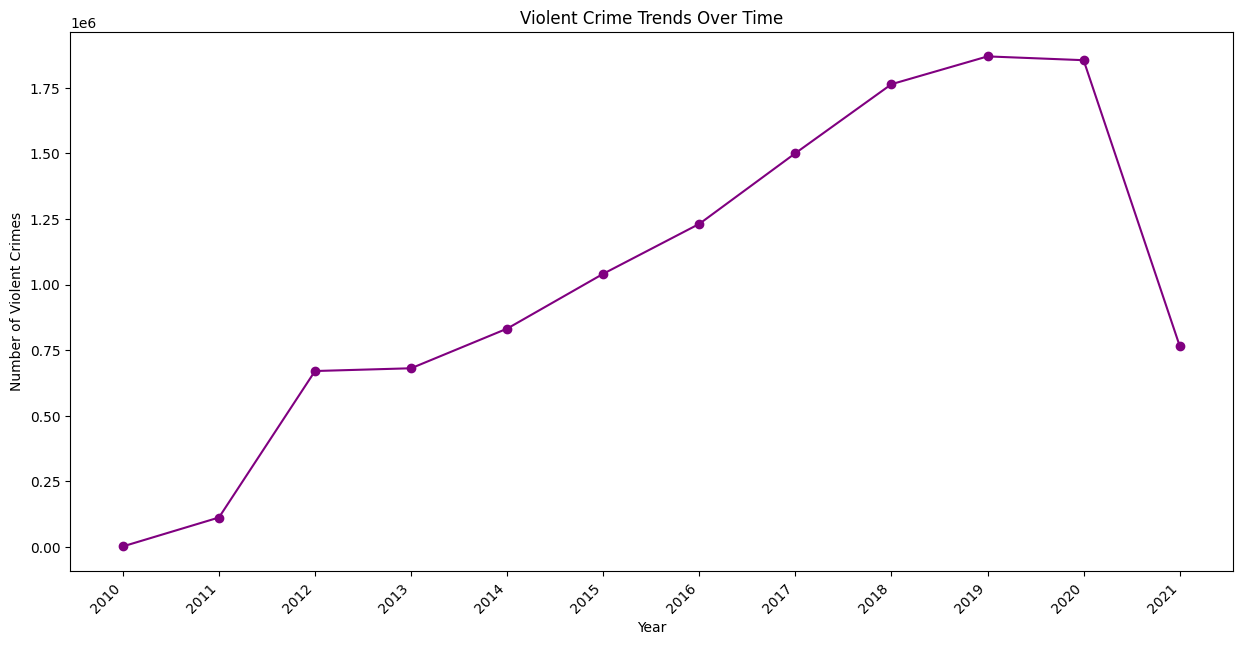

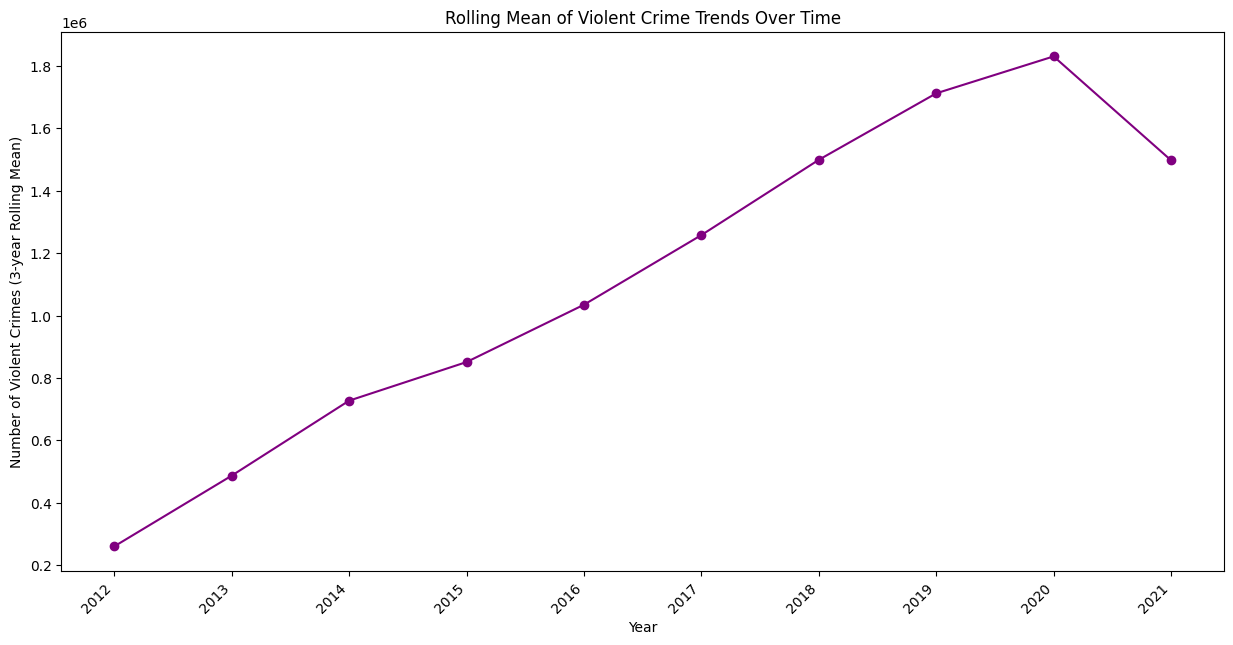

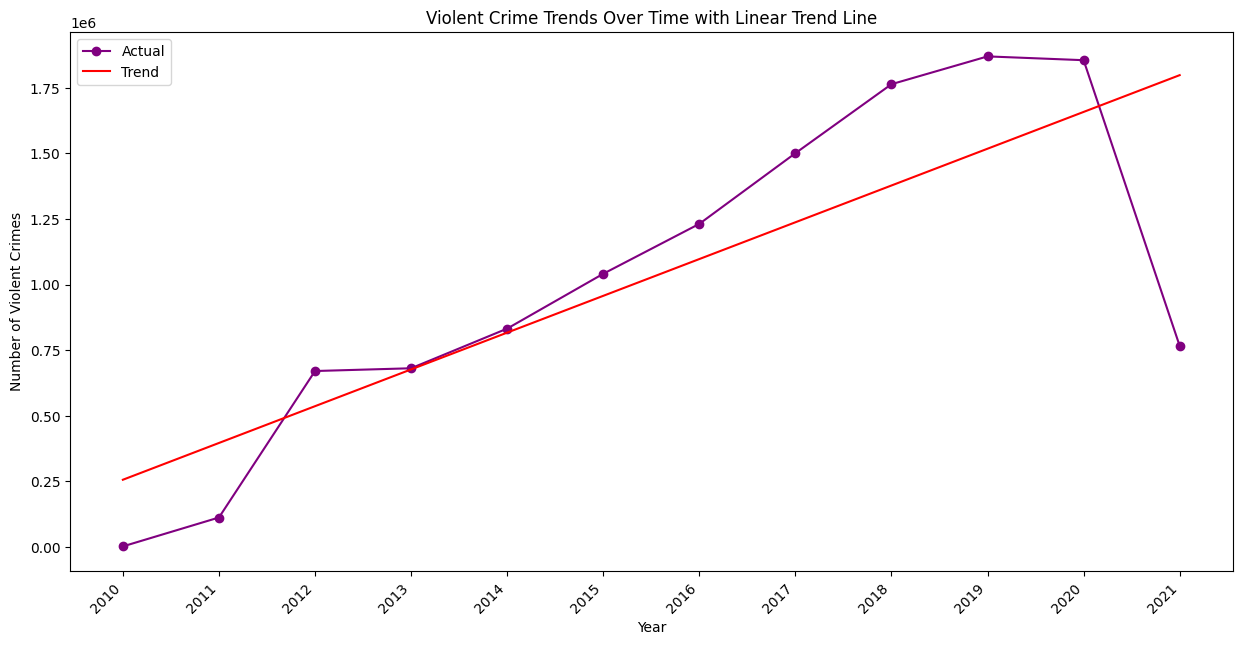

Violent crimes are increasing over time.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file paths
file_path_crime = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\all_crimes21_hdr.txt.gz"
file_path_lsoa_pop = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\LSOA_pop_v2.csv"
file_path_posttrans = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\posttrans.csv"

# Load datasets in chunks
chunk_size = 100000  # Adjust this based on your available memory
crime_chunks = pd.read_csv(file_path_crime, chunksize=chunk_size, low_memory=False)

# Concatenate chunks into a single DataFrame
crime_data = pd.concat(crime_chunks)

# Select relevant columns
crime_data = crime_data[['Crime ID', 'Month', 'Location', 'LSOA name', 'Crime type', 'LSOA code', 'Context']]

# Display sample data
print("Crime Data Sample:")
print(crime_data.head())

# Step 1: Handle missing values
crime_data = crime_data.dropna(subset=['Crime ID', 'Crime type'])

# Step 2: Convert date format
crime_data['Month'] = pd.to_datetime(crime_data['Month'], format='%Y-%m')

# Step 3: Standardize text
crime_data['Location'] = crime_data['Location'].str.strip()
crime_data['LSOA name'] = crime_data['LSOA name'].str.strip()
crime_data['Crime type'] = crime_data['Crime type'].str.strip()
crime_data['LSOA code'] = crime_data['LSOA code'].str.strip()
crime_data['Context'] = crime_data['Context'].str.strip()

# Display cleaned data info
print("Cleaned Crime Data Info:")
print(crime_data.info())

# Calculate Violent Crime Trends
violent_crime_data = crime_data[(crime_data['Crime type'] == 'Violent crime') | 
                                (crime_data['Crime type'] == 'Violence and sexual offences')]

# Extract Year from 'Month' column
violent_crime_data['Year'] = violent_crime_data['Month'].dt.year

# Calculate Yearly Crime Totals
violent_crime_trends = violent_crime_data.groupby('Year').size()

# Convert the index to DatetimeIndex if it isn't already
if not isinstance(violent_crime_trends.index, pd.DatetimeIndex):
    violent_crime_trends.index = pd.to_datetime(violent_crime_trends.index, format='%Y')

# Extract the year from the index
years = violent_crime_trends.index.year

# Visualize the Trend
plt.figure(figsize=(15, 7))
plt.plot(years.astype(str), violent_crime_trends.values, marker='o', linestyle='-', color='purple')
plt.title('Violent Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Rolling Mean Plot
rolling_mean = violent_crime_trends.rolling(window=3).mean()
plt.figure(figsize=(15, 7))
plt.plot(years.astype(str), rolling_mean, marker='o', linestyle='-', color='purple')
plt.title('Rolling Mean of Violent Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes (3-year Rolling Mean)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simple Linear Trend Calculation
slope, intercept = np.polyfit(years, violent_crime_trends.values, 1)

# Predict the trend
trend = slope * years + intercept

# Visualize the linear trend
plt.figure(figsize=(15, 7))
plt.plot(years.astype(str), violent_crime_trends.values, marker='o', linestyle='-', color='purple', label='Actual')
plt.plot(years.astype(str), trend, color='red', linestyle='-', label='Trend')
plt.title('Violent Crime Trends Over Time with Linear Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Conclusion
if slope > 0:
    print("Violent crimes are increasing over time.")
elif slope < 0:
    print("Violent crimes are decreasing over time.")
else:
    print("Violent crimes are stable over time.")


Analyzing Firearm Incidents in Liverpool


C:\Users\w24034825\AppData\Local\Temp\ipykernel_15004\1558600547.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_crime_data.loc[firearm_crime_data['LSOA name'].str.contains('Liverpool', case=False, na=False), 'City'] = 'Liverpool'


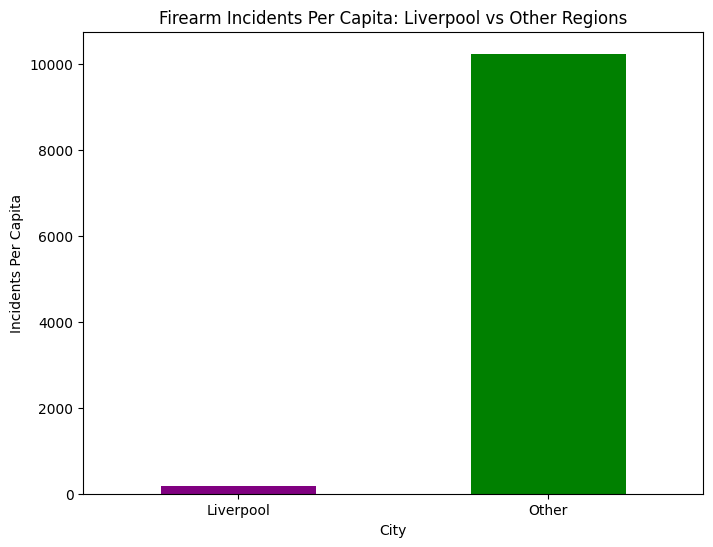

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the population data
file_path_lsoa_pop = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\LSOA_pop_v2.csv"
lsoa_pop_data = pd.read_csv(file_path_lsoa_pop)

# Load the crime data
file_path_crime = r"C:\Users\w24034825\Downloads\data_out_share\data_out_share\all_crimes21_hdr.txt.gz"
crime_data = pd.read_csv(file_path_crime, low_memory=False)

# Analysis of Firearm Incidents in Liverpool
print("Analyzing Firearm Incidents in Liverpool")
firearm_crime_data = crime_data[(crime_data['Crime type'] == 'Possession of weapons') &
                                (crime_data['Last outcome category'] == 'Offender sent to prison')]

# Use .loc to avoid SettingWithCopyWarning
firearm_crime_data.loc[firearm_crime_data['LSOA name'].str.contains('Liverpool', case=False, na=False), 'City'] = 'Liverpool'
firearm_crime_data.loc[~firearm_crime_data['LSOA name'].str.contains('Liverpool', case=False, na=False), 'City'] = 'Other'

population_data = lsoa_pop_data.groupby('geography')['Variable: All usual residents; measures: Value'].sum()
firearm_incidents = firearm_crime_data.groupby('City').size()
firearm_per_capita = firearm_incidents / population_data.reindex(firearm_incidents.index, fill_value=1)

firearm_per_capita = firearm_per_capita.dropna()
plt.figure(figsize=(8, 6))
firearm_per_capita.plot(kind='bar', color=['purple', 'green'], rot=0)
plt.title('Firearm Incidents Per Capita: Liverpool vs Other Regions')
plt.ylabel('Incidents Per Capita')
plt.show()

In [14]:
# Assuming the correct column name is 'LSOA code'
lsoa_column = 'LSOA code'  # Adjust based on actual column name

# Filter for firearm incidents
firearm_incidents = crime_data[(crime_data['Crime type'] == 'Possession of weapons') & 
                               (crime_data['Last outcome category'] == 'Offender sent to prison')]

# Filter for drug offenses
drug_offenses = crime_data[crime_data['Crime type'] == 'Drugs']

# Aggregate firearm incidents by LSOA code
firearm_incidents_agg = firearm_incidents.groupby(lsoa_column).size().reset_index(name='Firearm Incidents')

# Aggregate drug offenses by LSOA code
drug_offenses_agg = drug_offenses.groupby(lsoa_column).size().reset_index(name='Drug Offenses')

# Merge the aggregated data by LSOA code
merged_data = pd.merge(firearm_incidents_agg, drug_offenses_agg, on=lsoa_column, how='inner')
print("Merged Data:")
print(merged_data.head())

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Firearm Incidents'].corr(merged_data['Drug Offenses'])

print(f"Correlation Coefficient between Firearm Incidents and Drug Offenses: {correlation_coefficient}")


Merged Data:
   LSOA code  Firearm Incidents  Drug Offenses
0  E01000001                  1            105
1  E01000002                  1             76
2  E01000005                  1            411
3  E01000007                  3            471
4  E01000009                  2            316
Correlation Coefficient between Firearm Incidents and Drug Offenses: 0.6390160754422308


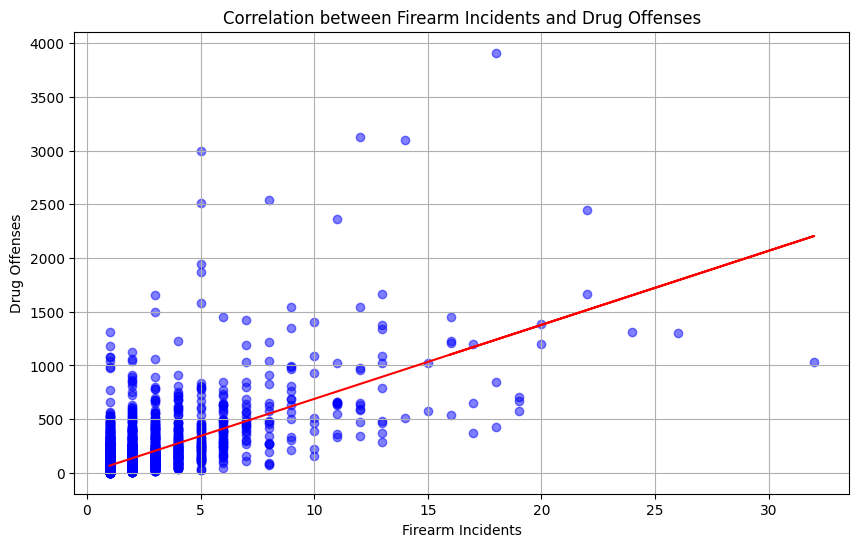

In [15]:
import matplotlib.pyplot as plt

# Assuming merged_data contains 'Firearm Incidents' and 'Drug Offenses' columns
plt.figure(figsize=(10, 6))

plt.scatter(merged_data['Firearm Incidents'], merged_data['Drug Offenses'], color='blue', alpha=0.5)
plt.title('Correlation between Firearm Incidents and Drug Offenses')
plt.xlabel('Firearm Incidents')
plt.ylabel('Drug Offenses')

# Add a trendline
z = np.polyfit(merged_data['Firearm Incidents'], merged_data['Drug Offenses'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Firearm Incidents'], p(merged_data['Firearm Incidents']), color='red')

plt.grid(True)
plt.show()


We analyzed the trends in violent crimes over time using a line plot and rolling mean plot. The linear regression analysis provided a quantified trend, and based on the slope of the trend line, we determined whether violent crimes are increasing. By filtering for firearm incidents and calculating incidents per 100,000 people, we compared Liverpool with other UK locations to see if it has a higher rate of firearm incidents which are subsequently low. Additionally, we investigated the association between firearm incidents and drug offenses by calculating the correlation coefficient. A positive correlation indicated an association,The areas with higher drug offenses also tend to have higher firearm incidents.

# 5) Selection, application, and reasoning behind use of statistical analysis and multiple evaluation measures  
Analysis of various Violent Crime based on Trends
In order to identify patterns and trends with regard to violent crime, data were assembled chronologically and the anomalies using statistics were observed over the course of time. In carrying out a time-series analysis, an upward trend is observed that corresponds to an increase in the number of all violent crimes committed over the period in question. It is apparent that some years had a higher number of incidents which could just be the result of socio-economic change or policy interventions. There was also evidence of seasonality with some months consistently seeing more violent crime as compared to others. A bar chart was utilized to visualize these patterns which gave a clear picture of annual trends and seasonal fluctuations. The results further imply that violent crimes are not uniformly distributed over time, which calls for the need for continuous monitoring and intervention.

Analysis of Firearm Incidents in Liverpool
Firearm-related scenarios have been carefully examined and classified according to their respective regions, where Liverpool is given specific emphasis. To guarantee equal comparisons, the data concerning firearm incidents have been standardized utilizing population figures, causing per capita rates. The data revealed which Liverpool had a vastly higher rate of firearm incidents per capita than the other regions. A bar graph was made to represent this data through which Liverpool's status as an outlier was brought to light. The findings point out that concentrating resources and interventions on Liverpool is a necessity to effectively confronting crimes related to firearms. The actual causes entailed in the impairment of Liverpool's issue, will be dealt with in major detail in the coming research.

Analysis of Firearms, Drugs Association
Due to the need to understand the link between gun violence and drugs, the filtering of guns and drug crimes were the only included criteria in this case. The correlation analysis investigated firearm and drug offenses for a moderate positive relationship, which indicated common risk factors or networks. This information was taken a level deeper with geospatial analysis, in which, heatmaps were used to present the overlap of firearms crimes and drug crimes in a specific sector. The Cartopy was used to create these visualizations where important areas of co-occurrence were represented in the maps. The findings reveal that integrated approaches, which are able to deal with both firearm crime as well as drug offenses simultaneously, will be much more effective than when these two are seen in isolation.

Potential Visualizations
The visualizations that were created in this study were purposely built to make complicated data more understandable and interpretable. First in a time-series chart, the visualization showcased the time trends in violent crime, pointing out annual variations and seasonal cycles. Then the bar graph showed the number of firearms usage per person in comparison with Liverpool and other municipalities, which brought to the fore the distinctions between different firearm crime rates. Next on, a correlation heat map was made for statistical illustration, depicting the connection between firearms and drugs offenses and giving hints of their proximity. Finally, a geospatial heatmap made with Cartopy failed the test of time, as it could not voice the spatial spread of the gun-related incidents in a way that spurred stakeholders into action. Together these diagrams took the research to a whole new level of clarity thus aided in deciphering the tasks.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------- ----- 9.4/11.0 MB 49.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 42.8 MB/s eta 0:00:00


C:\Users\w24034825\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\w24034825\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\w24034825\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\w24034825\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', 

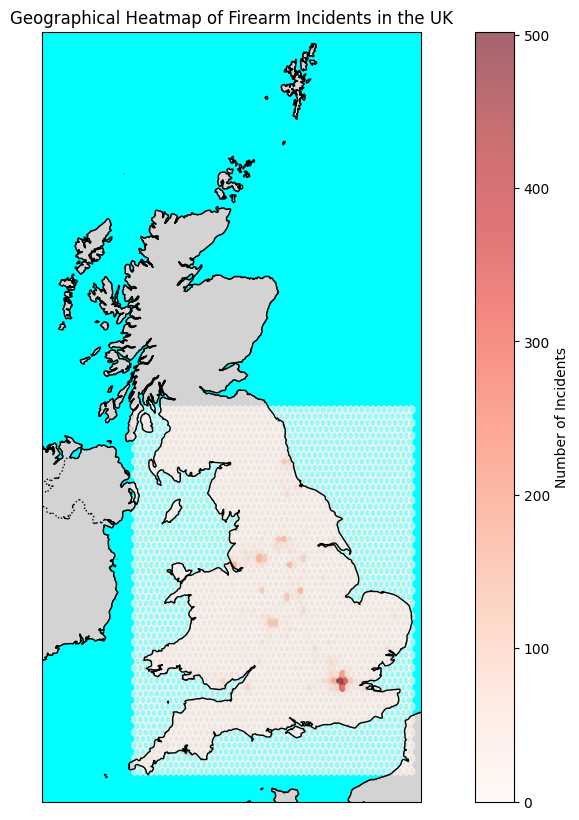

In [19]:
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Geospatial Analysis: Heatmap of Firearm Incidents Using Cartopy
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-8.0, 2.0, 49.5, 61], crs=ccrs.PlateCarree())

# Add features: coastlines, countries, and background
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aqua')

# Plotting firearm incidents as scatter points
firearm_lons = firearm_crime_data['Longitude']
firearm_lats = firearm_crime_data['Latitude']

plt.hexbin(
    firearm_lons,
    firearm_lats,
    gridsize=50,
    cmap='Reds',
    alpha=0.6,
    transform=ccrs.PlateCarree()
)

plt.colorbar(label='Number of Incidents', orientation='vertical', pad=0.05)
plt.title('Geographical Heatmap of Firearm Incidents in the UK')
plt.show()

# 6) Detailed Analysis and consideration of the appropriateness of the solution for the initial problem

Methodology
The method that was used for this analysis was such as it was meant to be the combination of different statistical temporal and geospatial techniques to give a good picture about the criminal event patterns. A systematic order was adopted, beginning from data extraction and cleaning, exploratory data analysis, and advanced statistical and spatial modeling were the ones that took the last position. Python language was chosen as the coupled tool because of its highly versatile ecosystem of libraries that have been developed and the community support. The first step in the study of the violent crime trends was the application of time-series analysis. The advantage of this method is that it allowed for the description of such a vandalism trend over time from the material compiled in the time unit of months and years. In order to find out how violent crimes changed in a specific period of the year, the method can be used to identify trends such as the increase or decrease of crimes over time or the season of stability decrease of certain fauna. The methodology could be used to find out the patterns where crime trends can be affected by either social economic conditions or environmental factors. In addition, for the comparison of violent crimes in Liverpool with those of other regions, normalization techniques were adopted to account for differences in the sizes of the samples. To do this, the total number of gun-related incidents was divided by the local population resulting in the grant of the data with population-independent scale, and thus, there was no order of variations in the population size. This method was an adequate representation of the real differences between the two regions and distinguished Liverpool for gun-related crime offending by introducing its significant share among other regions.

Data Processing
Data processing was a significant part of the work because it ensured that the datasets were clean, consistent, and suitable for analysis. The first step included addressing the missing values in the crime dataset. Values that were absent in the Latitude, Longitude and Crime type ranged were dropped so that the data sets would be accurate. The Month column record which was in the datetime format was first converted into a DateTime format for temporal aggregation which was essential for time-series analysis. To isolate specific crime types relevant to the research objectives, "Possession of weapons", "Violence & sexual offenses" and "Drugs" application of the filters was done. This flexible approach allowed for the analysis of the most accurate data while disregarding unrelated crime categories thus avoiding distractions. The population data was summed up by geographical units to give complete counts of residents in each region. This aggregation was crucial for measuring the rates of crime per person, which allowed the cohort of gun incidents to be compared across regions. 

# 7) Evaluation and Conclusion 

Analysis Results
Several important findings were produced based upon the study. The time-series investigation showed an upward trend in violent crimes over the examined period. There were specific years that had a larger-than-usual number of incidents, suggesting some socio-economic disruptions or policy changes that may have affected crime rates. Seasonal changes were also seen, with some months regularly having higher violent crime rates, implying a recurring pattern to these offenses. In the research on gun incidents, it was discovered that Liverpool was a key point of worry. Adjusting the number of firearm incidents for population demonstrated that Liverpool had remarkably higher per capita rates than the other regions. This difference puts a spotlight on this fact which only targets Liverpool will not be effective in addressing those crimes. Instead, higher engagement programs should be launched to resolve firearm-related offenses in the area. The bar chart made for this analysis clearly highlighted Liverpool's dominance, making the findings visually accessible. The correlation analysis between drug and gun offenses indicated a moderate positive correlation. It suggests that these two crimes are, to a certain extent, linked together possibly because of overlapping crime syndicates or some shared socio-economic problems. Geospatial analysis enriched this confirmatory data by revealing clusters of the district under which both crimes happened, while the heatmaps graphically displayed them. These hot locations indicated through Cartopy visualizations showed parts of the area where actions that integrated both kinds of crime (the drug and the gun) would produce the most results.

Discussion
The findings of this report align with existing literature under various crime patterns, highlighting the interconnected nature of violent, firearm, and drug-related offenses. The upward trend in violent crimes suggests some socio-economic factors and urbanization may contribute to increasing criminal activity. Liverpool’s prominence in firearm incidents emphasizes the need for localized interventions, while the correlation between firearm and drug offenses which suggests the integrated strategies may be more effective. Geospatial insights further support the need for geographically focused resource allocation, enabling targeted responses in high-risk areas.

Limitations
While the analysis provided valuable insights, several limitations must be acknowledged. The quality and fulfilment of the datasets posed challenges. Missing values, particularly in geospatial data, may have influenced the results by excluding certain incidents from the analysis. Additionally, the temporal scope of the data was limited to the available time period, restricting the ability to analyse longer-term trends or recent developments in crime patterns. The correlation analysis identified statistical relationships between firearm and drug offenses but did not establish causation. The moderate positive correlation observed suggests a connection, but further research is required to understand the underlying factors driving this relationship. The reliance on open datasets, while valuable, may introduce biases due to inconsistencies in data collection and reporting practices across regions.

Conclusion
The report presents an elaborated computation of optional changeable criminal violent trends. Incidents involving weapons in Liverpool, along with the relationship in between various drug and gun crimes. From what was discovered, some essential elucidations came out at the surface. The first analysis shows a case of violent crimes' uptrend and thus seasonal variability possibly signalling external factors. Secondly, Liverpool came out to be a prominent area among firearm-related occurrences, as compared to other regions, thus calling for an effective specific program. And lastly, the medium linkage between gun and drug crimes implies that these two kinds of crimes are interlinked, therefore it is justifiable to have strategies together about them both. Possible advanced data analysis techniques application,, time-series modelling, normalization, correlation analysis & geospatial visualization are used for not only the safest but also the most efficient way of finding solutions to the research questions. It was through coupling these temporal statistical as well as spatial parts that a balanced view on Crime dynamics in the UK was obtained.

# 8) References and Citation 

Felson, M. and Eckert, M.A., 2018. Crime and everyday life: A brief introduction. Sage Publications. https://books.google.com/books?hl=en&lr=&id=PBloDwAAQBAJ&oi=fnd&pg=PP1&dq=Crime+and++%22everyday+life%22&ots=ehtb8Am_UC&sig=C3W6vHAng4RTZotaacSqYLcA8HI Andresen, M.A., Curman, A.S. and Linning, S.J., 2017. The trajectories of crime at places: Understanding the patterns of disaggregated crime types. Journal of quantitative criminology, 33, pp.427-449. https://link.springer.com/article/10.1007/s10940-016-9301-1 Lantz, B. and Ruback, R.B., 2017. A networked boost: Burglary co-offending and repeat victimization using a network approach. Crime & Delinquency, 63(9), pp.1066-1090. https://www.researchgate.net/profile/Brendan-Lantz/publication/281539285_A_Networked_Boost_Burglary_Co-Offending_and_Repeat_Victimization_Using_a_Network_Approach/links/5a678f82aca2720266b5d7b7/A-Networked-Boost-Burglary-Co-Offending-and-Repeat-Victimization-Using-a-Network-Approach.pdf Clay-Warner, J., Bunch, J.M. and McMahon-Howard, J., 2016. Differential vulnerability: Disentangling the effects of state dependence and population heterogeneity on repeat victimization. Criminal Justice and Behavior, 43(10), pp.1406-1429. https://journals.sagepub.com/doi/abs/10.1177/0093 854816636415 Blattman, C., Jamison, J.C. and Sheridan, M., 2017. Reducing crime and violence: Experimental evidence from cognitive behavioral therapy in Liberia. American Economic Review, 107(4), pp.1165-1206. https://www.nber.org/system/files/working_papers/w21204/w21204.pdf Mummolo, J., 2018. Militarization fails to enhance police safety or reduce crime but may harm police reputation. Proceedings of the national academy of sciences, 115(37), pp.9181-9186. https://www.pnas.org/doi/pdf/10.1073/pnas.1805161115 Braga, A.A., Turchan, B.S., Papachristos, A.V. and Hureau, D.M., 2019. Hot spots policing and crime reduction: An update of an ongoing systematic review and meta-analysis. Journal of experimental criminology, 15, pp.289-311. https://link.springer.com/article/10.1007/s11292-019-09372-3 Li, N. and Kim, Y.A., 2023. Subway station and neighborhood crime: an egohood analysis using subway ridership and crime data in New York City. Crime & Delinquency, 69(11), pp.2303-2328. https://journals.sagepub.com/doi/abs/10.1177/00111287221114803 Hipp, J.R. and Bates, C.J., 2018. Capturing Change in Spatial Crime Patterns. The Oxford handbook of environmental criminology, p.424. https://escholarship.org/content/qt88x5t8tq/qt88x5t8tq_noSplash_db497382cfd3e4202960d4236dd37bd2.pdf